In [1]:
print("Multimedia Security Experiment 13")

Multimedia Security Experiment 13


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import myipf # 前面的实验编写的函数
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

In [119]:
img = plt.imread("standard_test_images/lena_gray_256.tif")

### 图像三维散点图

```python
fig = plt.figure()
ax1 = Axes3D(fig)
xd = np.linspace(0, 255, 256)
yd = np.linspace(0, 255, 256)
X, Y = np.meshgrid(xd, yd)
ax1.scatter3D(X, Y, img.flatten(), cmap="Blues")
plt.show()
```

In [201]:
def GPCAnalysis(src):
    vec_image = src.flatten()
    plane0, plane1 = [], []
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            if src[i][j] % 2 == 0:
                plane0.append(src[i][j]/2)
                plane1.append(src[i][j]/2)
            else:
                plane0.append((src[i][j]-1)/2)
                plane1.append((src[i][j]+1)/2)
    n0, n1, length = 0, 0, vec_image.shape[0]-1
    for i in range(length):
        n0 += np.abs(plane0[i] - plane0[i+1])
        n1 += np.abs(plane1[i] - plane1[i+1])

    return n1/n0

In [47]:
y = []

In [87]:
img = cv.imread("standard_test_images/woman_darkhair.tif")
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [88]:
y.append(GPCAnalysis(img))

In [115]:
y

[1.0003701677257986,
 0.9999863235761435,
 0.9989763752050158,
 1.0004270676952967,
 1.0002669249940768,
 1.000193558411578,
 0.9999765937170849,
 0.9995933400052491,
 0.9995764384151422,
 0.9998784589090872,
 0.999596128052171,
 0.9994239535749252]

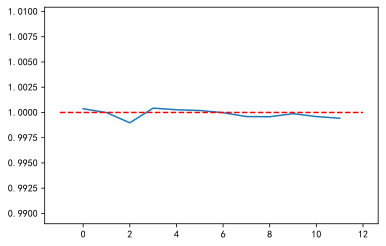

In [116]:
plt.ylim(np.min(y)-0.01, np.max(y)+0.01)
plt.plot(range(0, 12), y)
plt.plot([-1, 12], [1, 1], linestyle="--", c="r")
plt.show()

In [187]:
def LSBTest(src, percent=0.1):
    dst_image = src.copy()
    length, k = src.shape[0]*src.shape[1] * percent, 0
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            if k < length:
                if np.random.randint(2):
                    dst_image[i][j] = myipf.bitSetOne(dst_image[i][j], 1)
                else:
                    dst_image[i][j] = myipf.bitSetZero(dst_image[i][j], 1)
                k += 1
    return dst_image

In [208]:
img1 = plt.imread("standard_test_images/lena_gray_256.tif")
img2 = plt.imread("standard_test_images/cameraman.tif")

In [210]:
y2, y3, percent = [], [], 0
for i in range(11):
    y2.append(GPCAnalysis(LSBTest(img1, percent)))
    y3.append(GPCAnalysis(LSBTest(img2, percent)))
    percent+= 0.1

In [217]:
xd = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

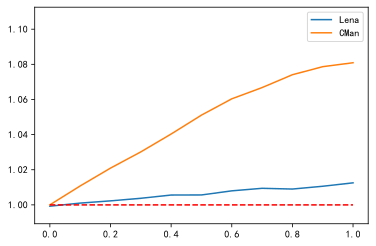

In [223]:
plt.ylim(np.min(y2)-0.01, np.max(y2)+0.1)
plt.plot(x_d, y2, label = "Lena")
plt.plot(x_d, y3, label = "CMan")
plt.plot([0,1], [1, 1], linestyle="--", c="r")
plt.legend()
plt.show()

In [221]:
n = len(xd)
B = np.array(y2)
C = np.array(y3)
A = np.array(([[xd[j], 1] for  j in range(n)]))
X = np.linalg.lstsq(A, B, rcond=None)[0]
Y = np.linalg.lstsq(A, C, rcond=None)[0]
a = X[0]
b = X[1]
print("Lena     图像：", "y =", a, "x +", b)
c = Y[0]
d = Y[1]
print("CameraMan图像：","y =", c, "x +", d)

Lena     图像： y = 0.012612406389993216 x + 0.999808618647459
CameraMan图像： y = 0.08443603141905176 x + 1.004534345041731


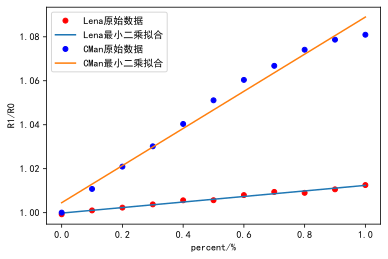

In [227]:
plt.plot(np.array(xd), B, "ro", label = "Lena原始数据", markersize = 5)
plt.plot(np.array(xd), a * np.array(xd) + b, label = "Lena最小二乘拟合")
plt.plot(np.array(xd), C, "bo", label = "CMan原始数据", markersize = 5)
plt.plot(np.array(xd), c * np.array(xd) + d, label = "CMan最小二乘拟合")
plt.legend()
plt.xlabel("percent/%")
plt.ylabel("R1/R0")
plt.show()